In [27]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import polyfit, poly1d

In [23]:
df = pd.read_csv("C:\\Users\\idarlene\\Desktop\\codigos\\Python\\Strava_PB_PY\\PY_PB_Strava\\data\\processed\\data.csv")

In [24]:
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,start_date_local,achievement_count,kudos_count,comment_count,...,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,data,duracao,end_date_local
0,Corrida ao entardecer,3.466,0 days 00:39:49,0 days 00:47:08,31.4,Run,2024-05-15 18:13:10+00:00,0,2,0,...,5.2236,9.7092,94.0,155.0,533.406929,513.240824,0,2024-05-15,0 days 00:47:08,2024-05-15 19:00:18+00:00
1,Treinamento com peso vespertino,0.000,0 days 00:40:03,0 days 00:40:03,0.0,WeightTraining,2024-05-15 17:23:12+00:00,0,1,0,...,0.0000,0.0000,100.2,133.0,0.000000,0.000000,0,2024-05-15,0 days 00:40:03,2024-05-15 18:03:15+00:00
2,Corrida da tarde,2.610,0 days 00:30:08,0 days 00:30:08,0.0,Run,2024-05-14 17:52:10+00:00,0,1,0,...,5.1984,0.0000,121.7,128.0,533.406929,513.240824,0,2024-05-14,0 days 00:30:08,2024-05-14 18:22:18+00:00
3,Simulador de escada vespertino,0.000,0 days 00:30:49,0 days 00:30:49,0.0,StairStepper,2024-05-14 17:20:36+00:00,0,1,0,...,0.0000,0.0000,146.5,174.0,0.000000,0.000000,0,2024-05-14,0 days 00:30:49,2024-05-14 17:51:25+00:00
4,Treinamento com peso vespertino,0.000,0 days 01:12:11,0 days 01:12:11,0.0,WeightTraining,2024-05-13 17:19:25+00:00,0,1,0,...,0.0000,0.0000,94.1,127.0,0.000000,0.000000,0,2024-05-13,0 days 01:12:11,2024-05-13 18:31:36+00:00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  542 non-null    object 
 1   distance              542 non-null    float64
 2   moving_time           542 non-null    object 
 3   elapsed_time          542 non-null    object 
 4   total_elevation_gain  542 non-null    float64
 5   sport_type            542 non-null    object 
 6   start_date_local      542 non-null    object 
 7   achievement_count     542 non-null    int64  
 8   kudos_count           542 non-null    int64  
 9   comment_count         542 non-null    int64  
 10  photo_count           542 non-null    int64  
 11  average_speed         542 non-null    float64
 12  max_speed             542 non-null    float64
 13  average_heartrate     542 non-null    float64
 14  max_heartrate         542 non-null    float64
 15  elev_high             5

In [26]:
df.columns

Index(['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'sport_type', 'start_date_local',
       'achievement_count', 'kudos_count', 'comment_count', 'photo_count',
       'average_speed', 'max_speed', 'average_heartrate', 'max_heartrate',
       'elev_high', 'elev_low', 'pr_count', 'data', 'duracao',
       'end_date_local'],
      dtype='object')

In [43]:
# Quantas atividades foram feitas neste mês?
(datetime.now()).strftime('%m-%Y')

df_atividades = df.copy()
df_atividades['start_date_local'] = pd.to_datetime(df_atividades['start_date_local'])

df_atividades = df_atividades.groupby([df_atividades['sport_type'], df_atividades['start_date_local'].dt.tz_localize(None).dt.to_period('M')])['start_date_local'].count()

df_atividades#[df_atividades['start_date_local'] == (datetime.now()).strftime('%m-%Y')]

sport_type      start_date_local
Ride            2024-04              3
                2024-05              1
Run             2022-11              6
                2022-12             11
                2023-01             13
                2023-02             10
                2023-03             13
                2023-04             16
                2023-05             21
                2023-06             52
                2023-07             52
                2023-08             24
                2023-09             35
                2023-10             20
                2023-11             17
                2023-12             16
                2024-01             26
                2024-02             17
                2024-03              5
                2024-05              4
StairStepper    2024-04              4
                2024-05              3
Swim            2024-01              1
                2024-04              1
Walk            2023-04        

In [ ]:
# Qual está sendo a atividade física mais praticada?

In [9]:
# Função para plotar gráfico de barras e linha de tendência
def plot_bar_trend(dataframe, x_col, y_col, title, xlabel, ylabel, color, trend_degree=1):
    plt.figure(figsize=(10, 5))
    bar_plot = sns.barplot(x=x_col, y=y_col, data=dataframe, color=color, zorder=2)
    
    # Adicionando rótulos de dados internos
    for index, row in dataframe.iterrows():
        bar_plot.text(index, row[y_col], round(row[y_col], 2), color='gray', ha="center")
    
    # Calculando a linha de tendência
    z = polyfit(dataframe.index, dataframe[y_col], trend_degree)
    p = poly1d(z)
    
    # Adicionando a linha de tendência ao gráfico
    plt.plot(dataframe.index, p(dataframe.index), color='orange', linestyle='--')
    
    # Adicionando linhas de grade
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
    
    # Ajustando as labels do eixo x para melhor visualização
    plt.xticks(rotation=45)
    
    # Adicionando título e labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Mostrando o gráfico
    plt.tight_layout()
    plt.show()

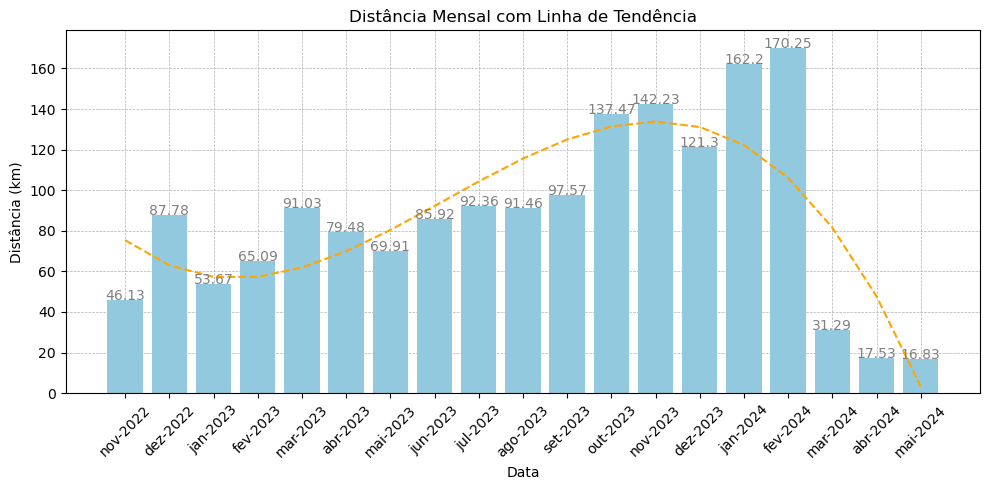

In [10]:
# Distância por mês
df_distancia = df[df["distance"] > 0].reset_index()
agrupado = df_distancia.groupby(df_distancia["data"])["distance"].sum().reset_index()
agrupado['data'] = pd.to_datetime(agrupado['data'])
agrupado.set_index('data', inplace=True)
distancia_mensal = agrupado.resample('M')['distance'].sum()
distancia_mensal  = distancia_mensal.reset_index()

distancia_mensal['mes_ano'] = distancia_mensal['data'].dt.strftime('%b-%Y')

# Substituindo os nomes dos meses em inglês pelos equivalentes em português
meses_portugues = {
    'Jan': 'jan', 'Feb': 'fev', 'Mar': 'mar', 'Apr': 'abr',
    'May': 'mai', 'Jun': 'jun', 'Jul': 'jul', 'Aug': 'ago',
    'Sep': 'set', 'Oct': 'out', 'Nov': 'nov', 'Dec': 'dez'
}

distancia_mensal['mes_ano'] = distancia_mensal['mes_ano'].replace(meses_portugues, regex=True)

plot_bar_trend(distancia_mensal, 'mes_ano', 'distance', 'Distância Mensal com Linha de Tendência', 'Data', 'Distância (km)', 'skyblue', trend_degree=3)

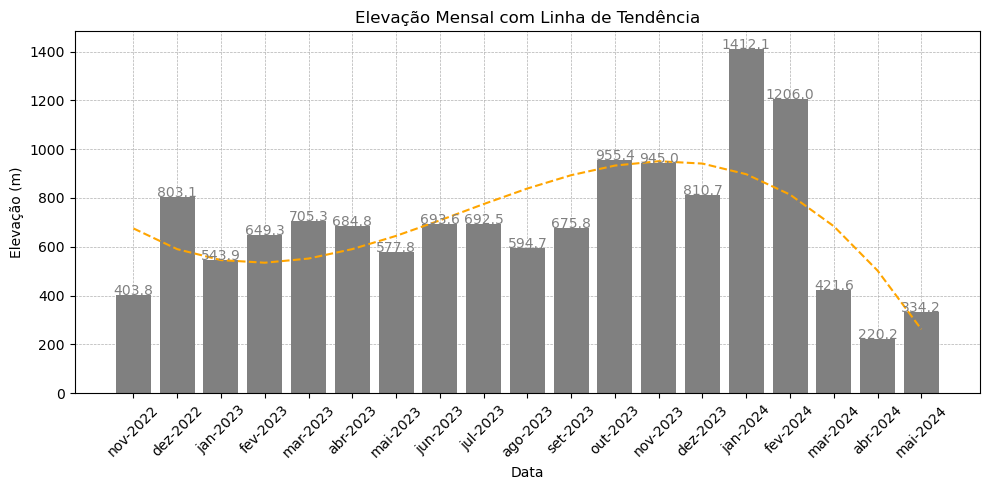

In [11]:
# ganho de elevação
df_elevacao = df[df["total_elevation_gain"] > 0].reset_index()
agrupado = df_elevacao.groupby(df_elevacao["data"])["total_elevation_gain"].sum().reset_index()
agrupado['data'] = pd.to_datetime(agrupado['data'])
agrupado.set_index('data', inplace=True)
df_elevacao = agrupado.resample('M')['total_elevation_gain'].sum()
df_elevacao  = df_elevacao.reset_index()

df_elevacao['mes_ano'] = df_elevacao['data'].dt.strftime('%b-%Y')

# Substituindo os nomes dos meses em inglês pelos equivalentes em português
meses_portugues = {
    'Jan': 'jan', 'Feb': 'fev', 'Mar': 'mar', 'Apr': 'abr',
    'May': 'mai', 'Jun': 'jun', 'Jul': 'jul', 'Aug': 'ago',
    'Sep': 'set', 'Oct': 'out', 'Nov': 'nov', 'Dec': 'dez'
}

df_elevacao['mes_ano'] = df_elevacao['mes_ano'].replace(meses_portugues, regex=True)

plot_bar_trend(df_elevacao, 'mes_ano', 'total_elevation_gain', 'Elevação Mensal com Linha de Tendência', 'Data', 'Elevação (m)', 'gray', trend_degree=3)

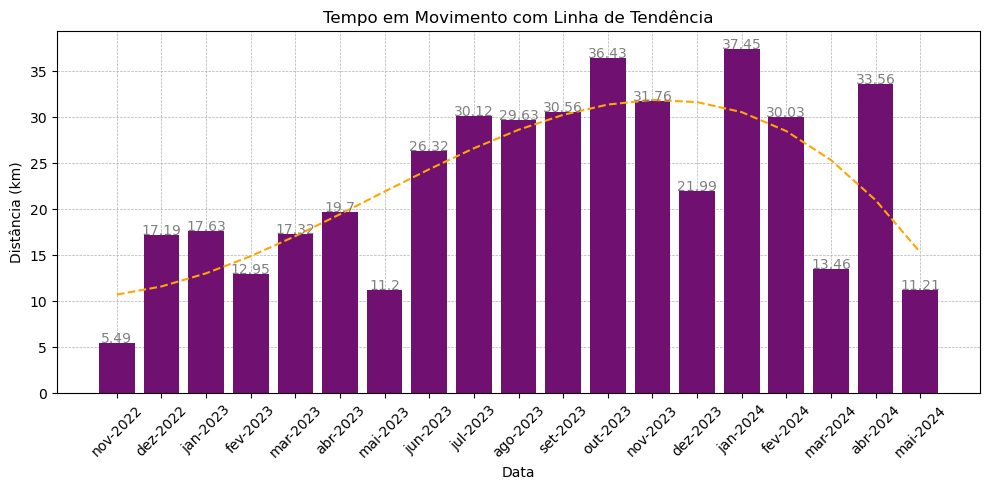

In [15]:
# Tempo em movimento por mês
df['duracao'] = pd.to_timedelta(df['duracao'])
df['duracao_segundos'] = df['duracao'].dt.total_seconds()

agrupado = df.groupby(df["data"])["duracao_segundos"].sum().reset_index()
agrupado['data'] = pd.to_datetime(agrupado['data'])
agrupado.set_index('data', inplace=True)
df_tempo = agrupado.resample('M')['duracao_segundos'].sum()
df_tempo  = df_tempo.reset_index()

def formatar_hhmmss(segundos):
    return segundos / 3600

# Suponha que 'df_tempo' é o seu DataFrame com a duração em segundos
df_tempo['duracao_formatada'] = df_tempo['duracao_segundos'].apply(formatar_hhmmss)


df_tempo['mes_ano'] = df_tempo['data'].dt.strftime('%b-%Y')

# Substituindo os nomes dos meses em inglês pelos equivalentes em português
meses_portugues = {
    'Jan': 'jan', 'Feb': 'fev', 'Mar': 'mar', 'Apr': 'abr',
    'May': 'mai', 'Jun': 'jun', 'Jul': 'jul', 'Aug': 'ago',
    'Sep': 'set', 'Oct': 'out', 'Nov': 'nov', 'Dec': 'dez'
}

df_tempo['mes_ano'] = df_tempo['mes_ano'].replace(meses_portugues, regex=True)

plot_bar_trend(df_tempo, 'mes_ano', 'duracao_formatada', 'Tempo em Movimento com Linha de Tendência', 'Data', 'Distância (km)', 'purple', trend_degree=3)

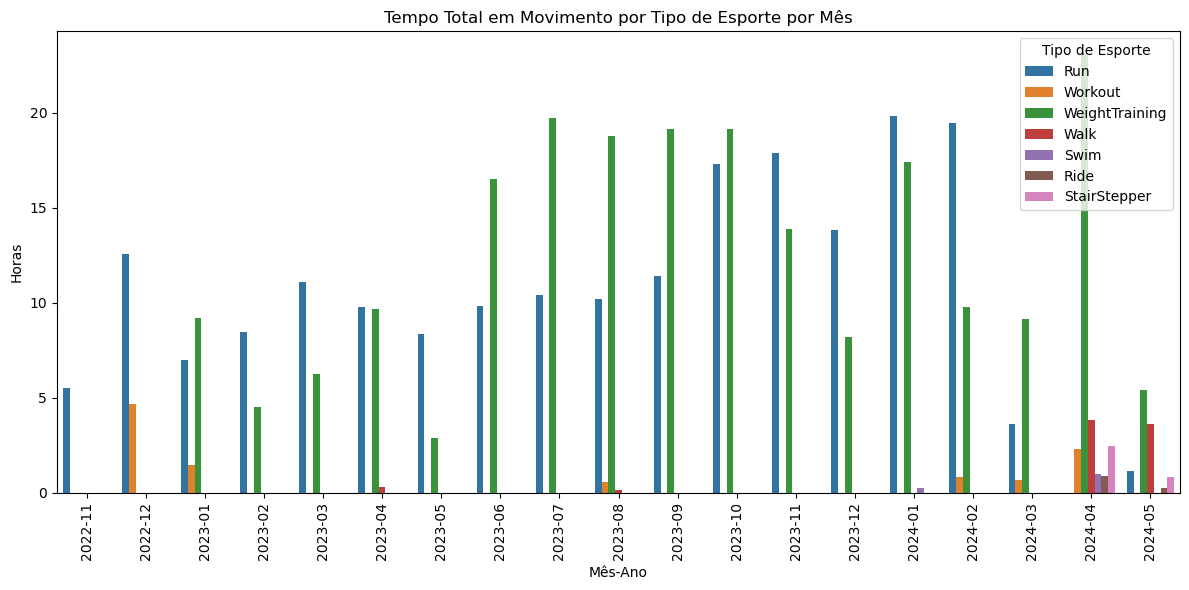

In [21]:
# Horas exercitadas por Esporte
df_teste = df.copy()
df_teste['start_date_local'] = pd.to_datetime(df_teste['start_date_local'])
df_teste['duracao'] = pd.to_timedelta(df_teste['duracao'])

def formatar_hhmmss(segundos):
    return segundos / 3600

# Corrigindo a aplicação da função 'formatar_hhmmss'
df_teste['duracao_formatada'] = df_teste['duracao'].dt.total_seconds().apply(formatar_hhmmss)

# Agora, agrupe por 'sport_type' e mês do 'start_date_local'
agrupado = df_teste.groupby([df_teste['sport_type'], df_teste['start_date_local'].dt.tz_localize(None).dt.to_period('M')])['duracao_formatada'].sum()

# Resetando o índice para facilitar a plotagem
agrupado = agrupado.reset_index()
agrupado.rename(columns={'duracao_formatada': 'total_hours'}, inplace=True)

agrupado.sort_values('start_date_local', inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='start_date_local', y='total_hours', hue='sport_type', data=agrupado)

plt.title('Tempo Total em Movimento por Tipo de Esporte por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Horas')
plt.legend(title='Tipo de Esporte')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()